# **Project**: "Network Monitoring"

### Switching & Routing

### Copyright (c) 2022 Konstantinos Marios Roumpeas, Giuseppe Maria Fiorentino - Politecnico di Milano

The purpose of this script is to analyze and interpret the information obtained during the monitoring period.

In [1]:
import os
import re
import warnings
import numpy as np
import pandas
import matplotlib.pyplot as plt


At first the two csv file are imported. They contained all the monitoring information of the network

In [2]:
flowstats = pandas.read_csv(r"FlowStats.csv")
portstats = pandas.read_csv(r"PortStats.csv")

Since the throughput was not given directly in the monitoring part,it has been calculated from the informations in the csv files.


In [3]:
new_flowstats = flowstats.assign(Thr=0)
indexTodiscard = flowstats[flowstats['duration_sec']==0].index
flowstats.drop(indexTodiscard, inplace=True)
for row in flowstats.index:

    thr = flowstats['byte_count'][row]/flowstats['duration_sec'][row]
    new_flowstats._set_value(row,'Thr',thr)



The data is plotted considered the observation period and according to it the duration_nsec, Throughput,byte count and packet count are plotted.

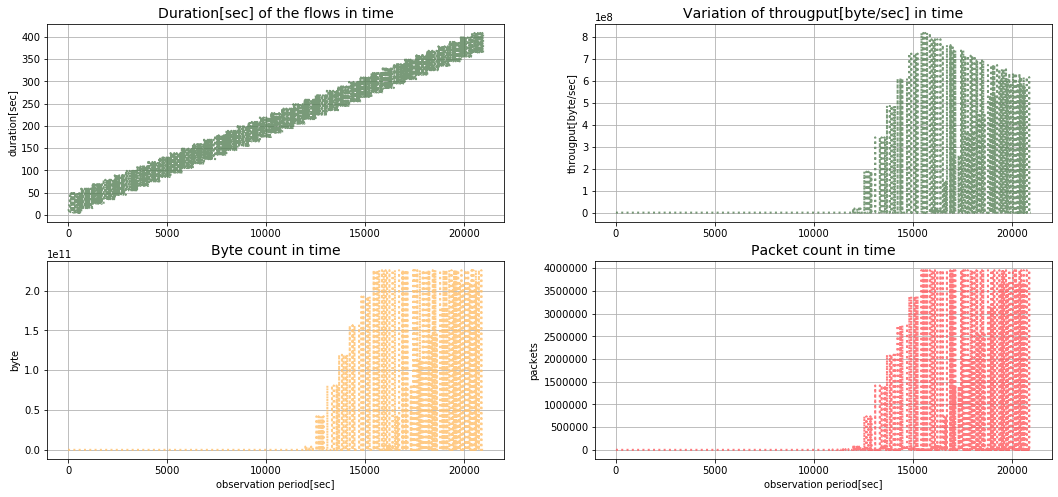

In [4]:
fig, axs = plt.subplots(2,2,figsize=(18,8))
paint = ['#588157', '#ffbf69', '#ff595e']

draw00 = flowstats['duration_sec'].iloc[np.where(flowstats['table_id'] == 0)[0]]
axs[0,0].plot(draw00, linestyle='dotted', lw=2, color=paint[0],label='duration[sec]', alpha=.8)
axs[0,0].set_title('Duration[sec] of the flows in time', fontsize=14)
axs[0,0].grid(visible = True)
axs[0,0].set(ylabel='duration[sec]')


draw01 = new_flowstats['Thr']
axs[0,1].plot(draw01, linestyle='dotted', lw=2, color=paint[0],label='Byte/sec', alpha=.8)
axs[0,1].set_title('Variation of througput[byte/sec] in time', fontsize=14)
axs[0,1].grid(visible = True)
axs[0,1].set(ylabel='througput[byte/sec]')


draw02 = flowstats['byte_count']
axs[1,0].plot(draw02, linestyle='dotted', lw=2, color=paint[1],label='byte count', alpha=.8)
axs[1,0].set_title('Byte count in time',fontsize=14)
axs[1,0].grid(visible= True)
axs[1,0].set(ylabel='byte')
axs[1,0].set(xlabel='observation period[sec]')

draw03 = flowstats['packet_count']
axs[1,1].plot(draw03, linestyle='dotted', lw=2, color=paint[2],label='packet count', alpha=.8)
axs[1,1].set_title('Packet count in time',fontsize=14)
axs[1,1].grid(visible= True)
axs[1,1].set(ylabel='packets')
axs[1,1].set(xlabel='observation period[sec]')

#for the priority we have just two types of priorities 0 and 65..
plt.show()


For each flow and for each port is done a distinction according to the specific datapath

In [5]:
flowstats_grouped=flowstats.groupby('datapath')
flow_1 = flowstats_grouped.get_group(1)
flow_2 = flowstats_grouped.get_group(2)
flow_3 = flowstats_grouped.get_group(3)
flow_4 = flowstats_grouped.get_group(4)
flow_5 = flowstats_grouped.get_group(5)
flow_6 = flowstats_grouped.get_group(6)
flow_7 = flowstats_grouped.get_group(7)
flow_8 = flowstats_grouped.get_group(8)
flow_9 = flowstats_grouped.get_group(9)
flow_10 = flowstats_grouped.get_group(10)
flow_11 = flowstats_grouped.get_group(11)
flow_12 = flowstats_grouped.get_group(12)

#the dual procedure is done for the portstats

portstats_grouped = portstats.groupby('datapath')
datapath_1 = portstats_grouped.get_group(1)
datapath_2 = portstats_grouped.get_group(2)
datapath_3 = portstats_grouped.get_group(3)
datapath_4 = portstats_grouped.get_group(4)
datapath_5 = portstats_grouped.get_group(5)
datapath_6 = portstats_grouped.get_group(6)
datapath_7 = portstats_grouped.get_group(7)
datapath_8 = portstats_grouped.get_group(8)
datapath_9 = portstats_grouped.get_group(9)
datapath_10 = portstats_grouped.get_group(10)
datapath_11 = portstats_grouped.get_group(11)
datapath_12 = portstats_grouped.get_group(12)


For each port is distincted the number of tx and rx pkts

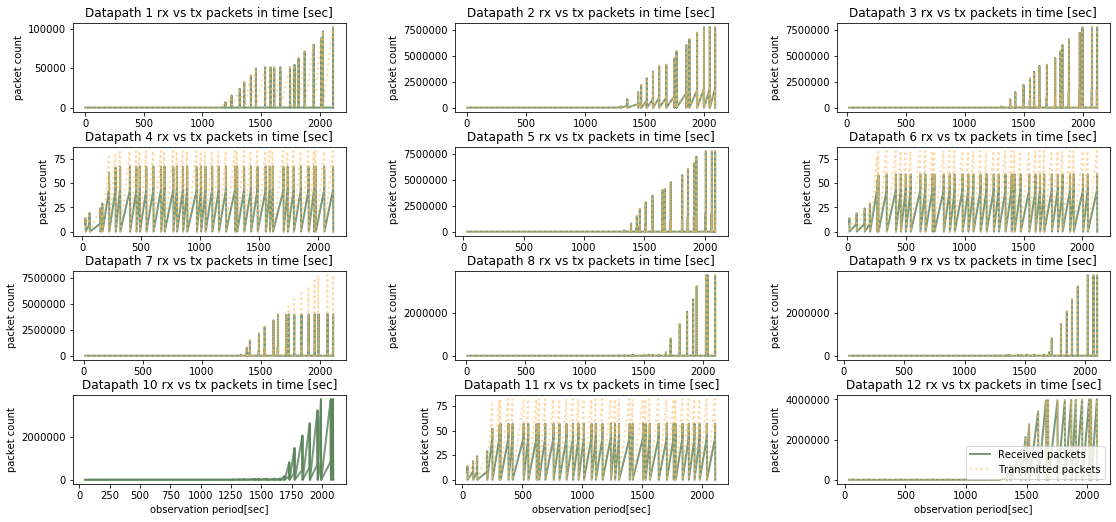

In [6]:
fig1, axs1 = plt.subplots(4,3,figsize=(18,8))

axs1[0,0].plot(datapath_1['rx-pkts'], lw=2, color=paint[0],label='rx pkts', alpha=.8)
axs1[0,0].plot(datapath_1['tx-pkts'],linestyle='dotted', lw=2, color=paint[1],label='tx pkts', alpha=.6)
axs1[0,0].set_title('Datapath 1 rx vs tx packets in time [sec]')
axs1[0,0].set(ylabel='packet count')

axs1[0,1].plot(datapath_2['rx-pkts'], lw=2, color=paint[0],label='rx pkts', alpha=.8)
axs1[0,1].plot(datapath_2['rx-pkts'],linestyle='dotted', lw=2, color=paint[1],label='tx pkts', alpha=.6)
axs1[0,1].set_title('Datapath 2 rx vs tx packets in time [sec]')
axs1[0,1].set(ylabel='packet count')

axs1[0,2].plot(datapath_3['rx-pkts'], lw=2, color=paint[0],label='rx pkts', alpha=.8)
axs1[0,2].plot(datapath_3['tx-pkts'],linestyle='dotted', lw=2, color=paint[1],label='tx pkts', alpha=.6)
axs1[0,2].set_title('Datapath 3 rx vs tx packets in time [sec]')
axs1[0,2].set(ylabel='packet count')

axs1[1,0].plot(datapath_4['rx-pkts'], lw=2, color=paint[0],label='rx pkts', alpha=.8)
axs1[1,0].plot(datapath_4['tx-pkts'],linestyle='dotted', lw=2, color=paint[1],label='tx pkts', alpha=.6)
axs1[1,0].set_title('Datapath 4 rx vs tx packets in time [sec]')
axs1[1,0].set(ylabel='packet count')

axs1[1,1].plot(datapath_5['rx-pkts'], lw=2, color=paint[0],label='rx pkts', alpha=.8)
axs1[1,1].plot(datapath_5['tx-pkts'],linestyle='dotted', lw=2, color=paint[1],label='tx pkts', alpha=.6)
axs1[1,1].set_title('Datapath 5 rx vs tx packets in time [sec]')
axs1[1,1].set(ylabel='packet count')

axs1[1,2].plot(datapath_6['rx-pkts'], lw=2, color=paint[0],label='rx pkts', alpha=.8)
axs1[1,2].plot(datapath_6['tx-pkts'],linestyle='dotted', lw=2, color=paint[1],label='tx pkts', alpha=.6)
axs1[1,2].set_title('Datapath 6 rx vs tx packets in time [sec]')
axs1[1,2].set(ylabel='packet count')

axs1[2,0].plot(datapath_7['rx-pkts'], lw=2, color=paint[0],label='rx pkts', alpha=.8)
axs1[2,0].plot(datapath_7['tx-pkts'],linestyle='dotted', lw=2, color=paint[1],label='tx pkts', alpha=.6)
axs1[2,0].set_title('Datapath 7 rx vs tx packets in time [sec]')
axs1[2,0].set(ylabel='packet count')

axs1[2,1].plot(datapath_8['rx-pkts'], lw=2, color=paint[0],label='rx pkts', alpha=.8)
axs1[2,1].plot(datapath_8['tx-pkts'],linestyle='dotted', lw=2, color=paint[1],label='tx pkts', alpha=.6)
axs1[2,1].set_title('Datapath 8 rx vs tx packets in time [sec]')
axs1[2,1].set(ylabel='packet count')

axs1[2,2].plot(datapath_9['rx-pkts'], lw=2, color=paint[0],label='rx pkts', alpha=.8)
axs1[2,2].plot(datapath_9['tx-pkts'],linestyle='dotted', lw=2, color=paint[1],label='tx pkts', alpha=.6)
axs1[2,2].set_title('Datapath 9 rx vs tx packets in time [sec]')
axs1[2,2].set(ylabel='packet count')

axs1[3,0].plot(datapath_10['rx-pkts'], lw=2, color=paint[0],label='rx pkts', alpha=.8)
axs1[3,0].plot(datapath_10['tx-pkts'], lw=2, color=paint[0],label='tx pkts', alpha=.8)
axs1[3,0].set_title('Datapath 10 rx vs tx packets in time [sec]')
axs1[3,0].set(xlabel='observation period[sec]')
axs1[3,0].set(ylabel='packet count')

axs1[3,1].plot(datapath_11['rx-pkts'], lw=2, color=paint[0],label='tx pkts', alpha=.8)
axs1[3,1].plot(datapath_11['tx-pkts'],linestyle='dotted', lw=2, color=paint[1],label='tx pkts', alpha=.6)
axs1[3,1].set_title('Datapath 11 rx vs tx packets in time [sec]')
axs1[3,1].set(xlabel='observation period[sec]')
axs1[3,1].set(ylabel='packet count')

axs1[3,2].plot(datapath_12['rx-pkts'], lw=2, color=paint[0],label='rx pkts', alpha=.8)
axs1[3,2].plot(datapath_12['tx-pkts'],linestyle='dotted', lw=2, color=paint[1],label='tx pkts', alpha=.6)
axs1[3,2].set_title('Datapath 12 rx vs tx packets in time [sec]')
axs1[3,2].set(xlabel='observation period[sec]')
axs1[3,2].set(ylabel='packet count')

#add legend 
plt.legend(['Received packets', 'Transmitted packets'], loc="lower right")

#adjusting the subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()



The mean packet count for each datapath is then plotted in order to see which of the datapaths is more busy

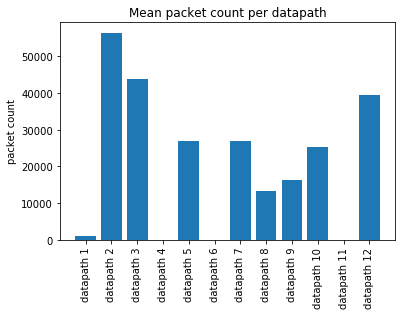

In [7]:
list_of_datapath=['datapath 1','datapath 2','datapath 3','datapath 4','datapath 5','datapath 6','datapath 7','datapath 8','datapath 9','datapath 10','datapath 11','datapath 12',]
list_of_pktcount=[flow_1['packet_count'].mean(),flow_2['packet_count'].mean(),flow_3['packet_count'].mean(),flow_4['packet_count'].mean(),flow_5['packet_count'].mean(),flow_6['packet_count'].mean(),flow_7['packet_count'].mean(),flow_8['packet_count'].mean(),flow_9['packet_count'].mean(),flow_10['packet_count'].mean(),flow_11['packet_count'].mean(),flow_12['packet_count'].mean()]

# plotting a bar chart
plt.bar(list_of_datapath, list_of_pktcount, align='center')

# name y-axis
plt.ylabel('packet count')

# plot title
plt.title('Mean packet count per datapath')

# rotate the xticks so they are easily readable
plt.xticks(rotation=90)
plt.show()


A pie chart is then used to derive the most common types of flows in the network

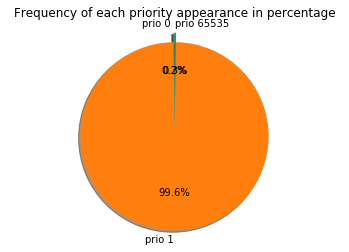

In [8]:
flowstats_prio = flowstats.groupby('priority')
prio_0 = flowstats_prio.get_group(0)
prio_1 = flowstats_prio.get_group(1)
prio_65535 = flowstats_prio.get_group(65535)

#bar plot for showing the percentage of packets with different priorities
y = [prio_0['packet_count'].mean(),prio_1['packet_count'].mean(),prio_65535['packet_count'].mean()]
my_labels = "prio 0 ","prio 1","prio 65535"
explode = (0, 0.1, 0)

fig2, ax2 = plt.subplots()
ax2.pie(y, explode=explode, labels=my_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Frequency of each priority appearance in percentage')
plt.show()



Print the median packet size that matches each priority

In [9]:
print("For each priority it is analyzed the median packet size: ")
print("Priority 0 median pkt size: {:.2f}".format(prio_0['byte_count'].median()/prio_0['packet_count'].median()), "B")
print("Priority 1 median pkt size: {:.2f}".format(prio_1['byte_count'].median()/prio_1['packet_count'].median()), "B")
print("Priority 65535 median pkt size: {:.2f}".format(prio_65535['byte_count'].median()/prio_65535['packet_count'].median()), "B")

For each priority it is analyzed the median packet size: 
Priority 0 median pkt size: 72.24 B
Priority 1 median pkt size: 98.00 B
Priority 65535 median pkt size: 60.00 B


Investigate the incoming vs outgoing traffic per port for all datapaths

In [10]:
portstats_port = portstats.groupby('port')
port_1 = portstats_port.get_group(1)
port_2 = portstats_port.get_group(2)
port_3 = portstats_port.get_group(3)
port_fffffffe = portstats_port.get_group(4294967294)

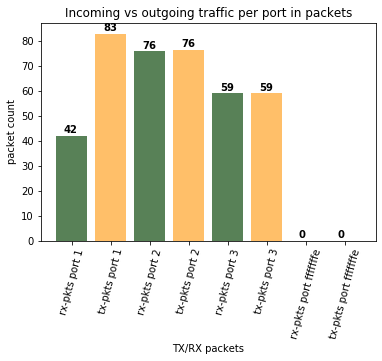

In [11]:
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5, 6, 7, 8]
  
# heights of bars
height = [port_1['rx-pkts'].median(), port_1['tx-pkts'].median(), port_2['rx-pkts'].median(), port_2['tx-pkts'].median(), 
    port_3['rx-pkts'].median(), port_3['tx-pkts'].median(), port_fffffffe['rx-pkts'].median(), port_fffffffe['tx-pkts'].median()]
  
# labels for bars
tick_label = ['rx-pkts port 1', 'tx-pkts port 1', 'rx-pkts port 2', 'tx-pkts port 2', 
    'rx-pkts port 3', 'tx-pkts port 3', 'rx-pkts port fffffffe', 'tx-pkts port fffffffe']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['#588157', '#ffbf69', '#588157', '#ffbf69', '#588157', '#ffbf69', '#588157', '#ffbf69'])

# write the number of packets of each port on top of the bar
xlocs=[i+1 for i in range(len(height))]
for i, v in enumerate(height):
    plt.text(xlocs[i] - 0.2, v + 1, str("{:.0f}".format(v)), fontweight='bold')
  
# naming the x-axis
plt.xlabel('TX/RX packets')
# naming the y-axis
plt.ylabel('packet count')
# plot title
plt.title('Incoming vs outgoing traffic per port in packets')

# rotate the xticks so they are easily readable
plt.xticks(rotation=75)
  
# function to show the plot
plt.show()